## Week 3: Tree Ensemble

1. Reference

* Text:

  "An Introduction to Statistical Learning with Applications in R" (ISLR) [링크 텍스트](https://www.statlearning.com/)
  
  "An Introduction to Statistical Learning with Applications in Python" (ISLR) [링크 텍스트](https://www.statlearning.com/)

* Dataset: supermarket_sales.csv
https://www.kaggle.com/datasets/arunjangir245/super-market-sales/data

* Copied https://www.kaggle.com/code/arunjangir245/supermarket-sales-prediction-and-eda#-Loading-the-Dataset

2. Introduction

  **What is *Tree-Based Methods?***

* Here, we describe tree-based methods for regression and classification.
* These involve stratifying or segmenting the predictor space into a number of simple regions.
* Since the set of splitting rules used to segment the predictor space can be summarized in a tree, these types of approaches are known as decision-tree methods.

  **Pros and Cons**

  ▲ Tree-based methods are simple and useful for interpretation.

  ▼ However, they typically are not competitive with the best supervised learning approaches in terms of prediction accuracy.

* Hence, we also discuss bagging, random forests, and boosting. These methods grow multiple trees which are then combined to yield a single consensus prediction.

* Combining a large number of trees can often result in dramatic improvements in prediction accuracy, at the expense of some loss interpretation. (예측 정확성 ↑, 해석 ↓)

### About the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files

# uploaded = files.upload()

Saving supermarket_sales.csv to supermarket_sales.csv


In [ ]:
df = pd.read_csv("/content/supermarket_sales.csv")

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.shape

(1000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
df['Customer type'].nunique()

2

In [ ]:
df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [ ]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [ ]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

cities in Myanmar

In [ ]:
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [ ]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

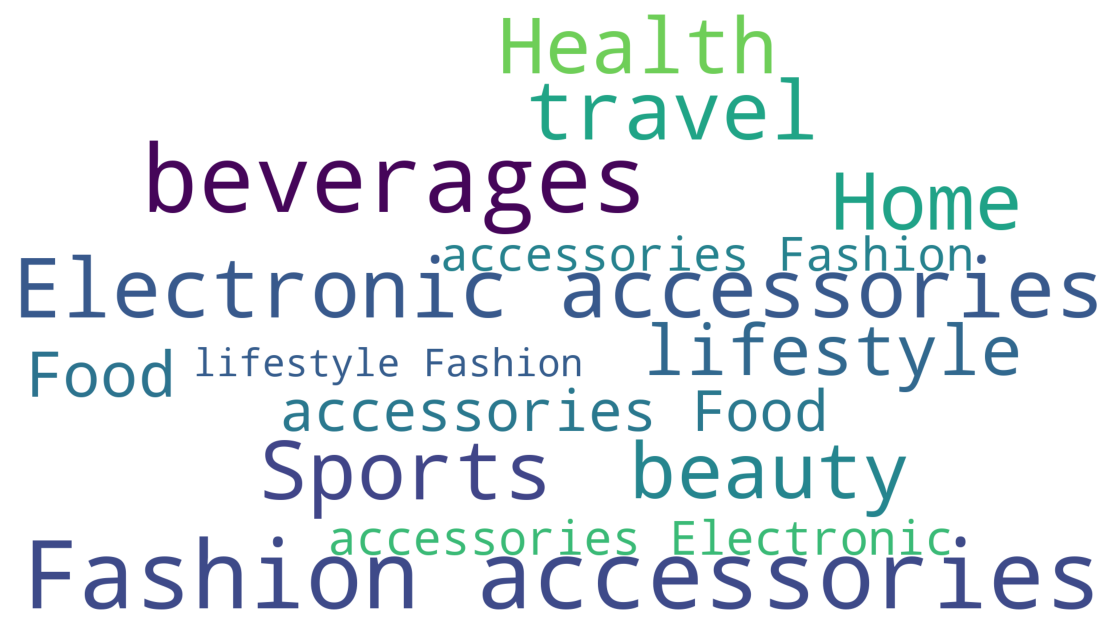

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(20, 8))
wordcloud = WordCloud(background_color='White', width=1920, height=1080).generate(" ".join(df['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

no need to preprocess the data in terms of missing values.

### Exploratory Data Analysis (EDA)

1. Scatter plot

* A scatter plot uses dots to represent values for two different numeric variables.
* The position of each dot on the horizontal and vertical axis indicates values for an individual data point.
* Scatter plots are used to observe relationships between variables.

<Axes: xlabel='Unit price', ylabel='Rating'>

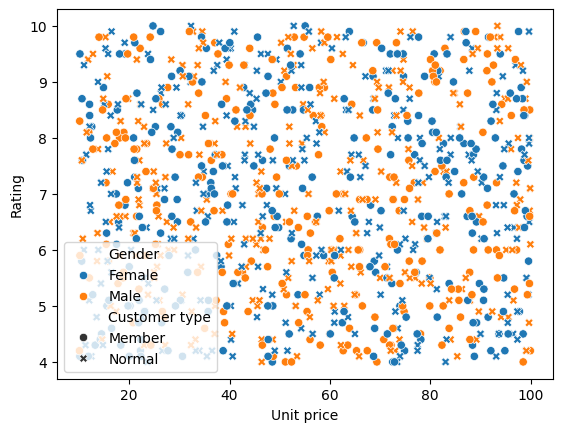

In [ ]:
sns.scatterplot(data=df, x='Unit price', y='Rating', hue='Gender', style='Customer type')

성별 및 고객유형별 가격에 따른 만족도

2. Boxplot

* A boxplot is a standardized way of displaying the distribution of data based on a five number summary(minimum, first quartile (Q1), median, third quartile (Q3), and maximum).
* It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

<Axes: xlabel='gross income'>

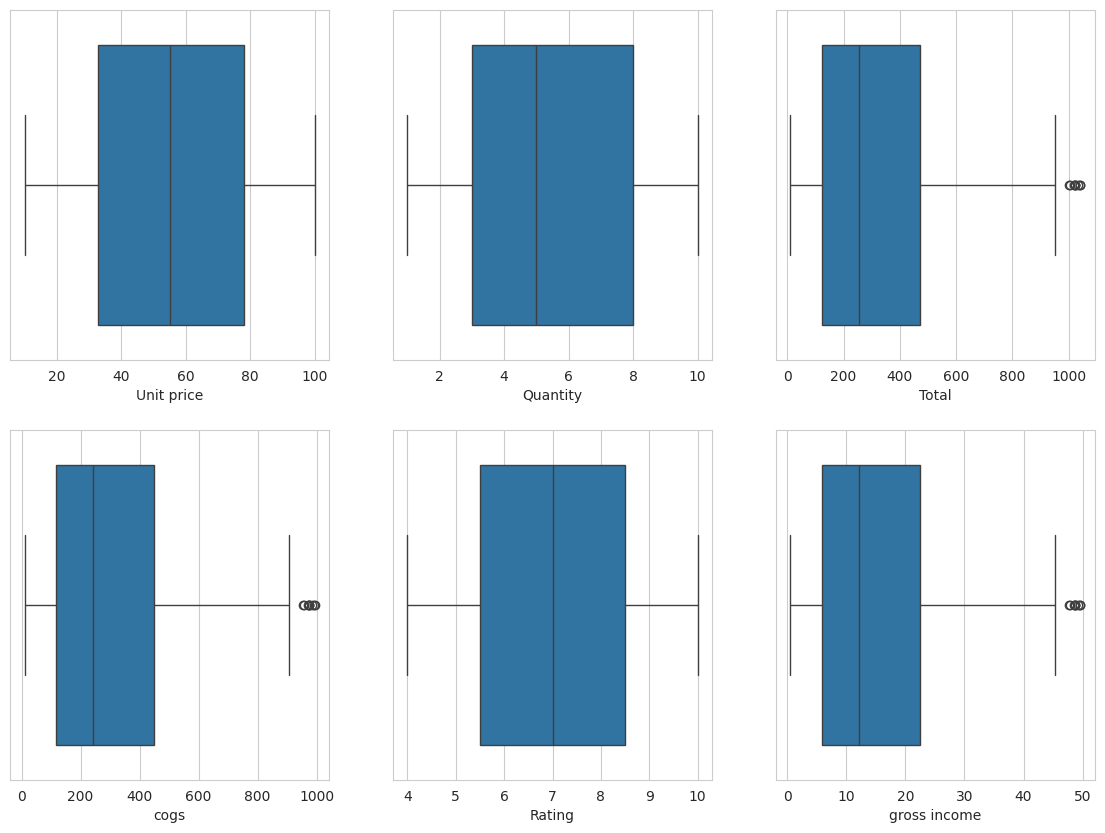

In [ ]:
plt.figure(figsize=(14, 10))
sns.set_style(style='whitegrid')
plt.subplot(2, 3, 1)
sns.boxplot(x='Unit price', data=df)
plt.subplot(2, 3, 2)
sns.boxplot(x='Quantity', data=df)
plt.subplot(2,3, 3)
sns.boxplot(x='Total', data=df) # total: the total cost of the transaction, including tax
plt.subplot(2, 3, 4)
sns.boxplot(x='cogs', data=df) # cogs: cost of goods sold
plt.subplot(2, 3, 5)
sns.boxplot(x='Rating', data=df)
plt.subplot(2, 3, 6)
sns.boxplot(x='gross income', data=df)

3. KDEplot

* kdeplot is a data visualization technique that employes Kernel Density Estimation (KDE) to estimate and display the probability density function of continuous data.
* It produces a smoothed, continous curve that reveals the underlying distribution's shape and characteristics.
* This method is particularly useful for exploring data patterns, identifying peaks, and visualizing the density of both univariate and bivariate data.
* kdeplot offers a complementary perspective to histograms and aids in understanding the distribution of data in a more detailed and visually appealing manner.

<Axes: xlabel='gross income', ylabel='Density'>

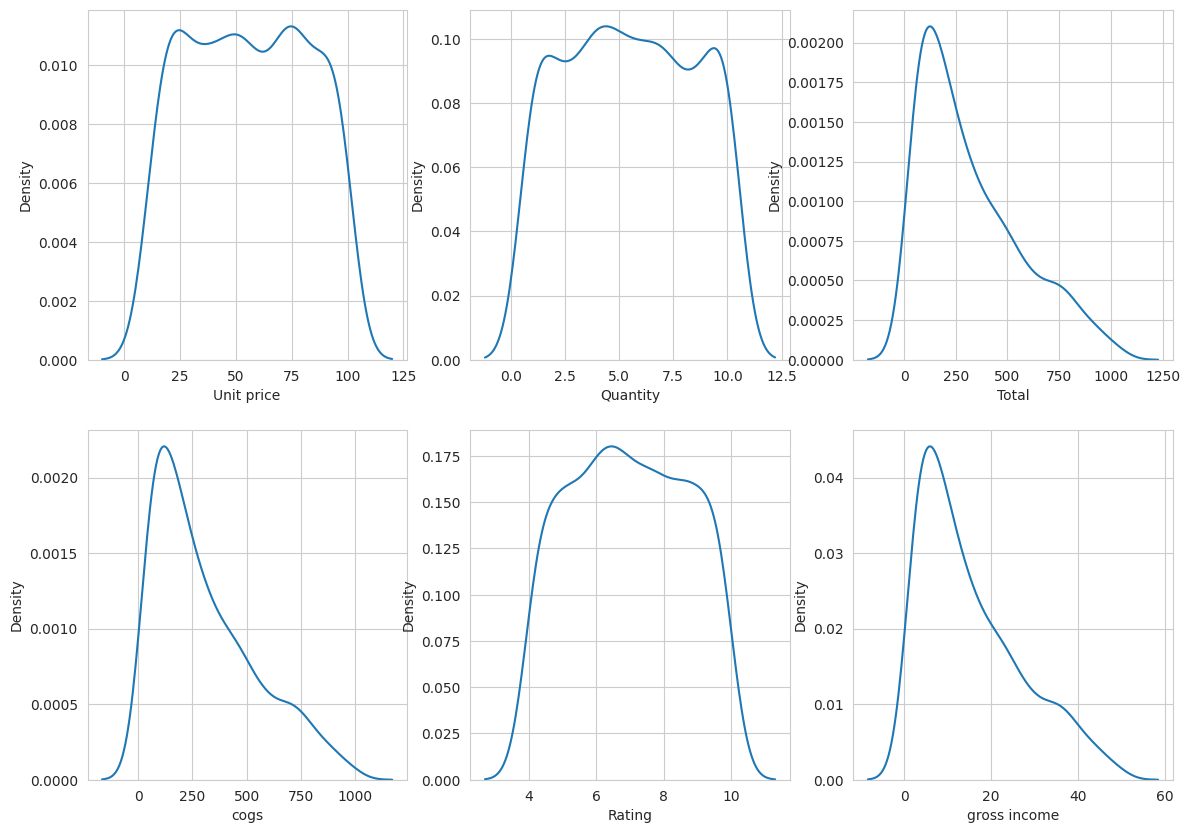

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.kdeplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.kdeplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.kdeplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.kdeplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.kdeplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.kdeplot(x='gross income',data=df)

4. Pairplot

* A pairplot plots a pairwise relationships in a dataset.
* The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

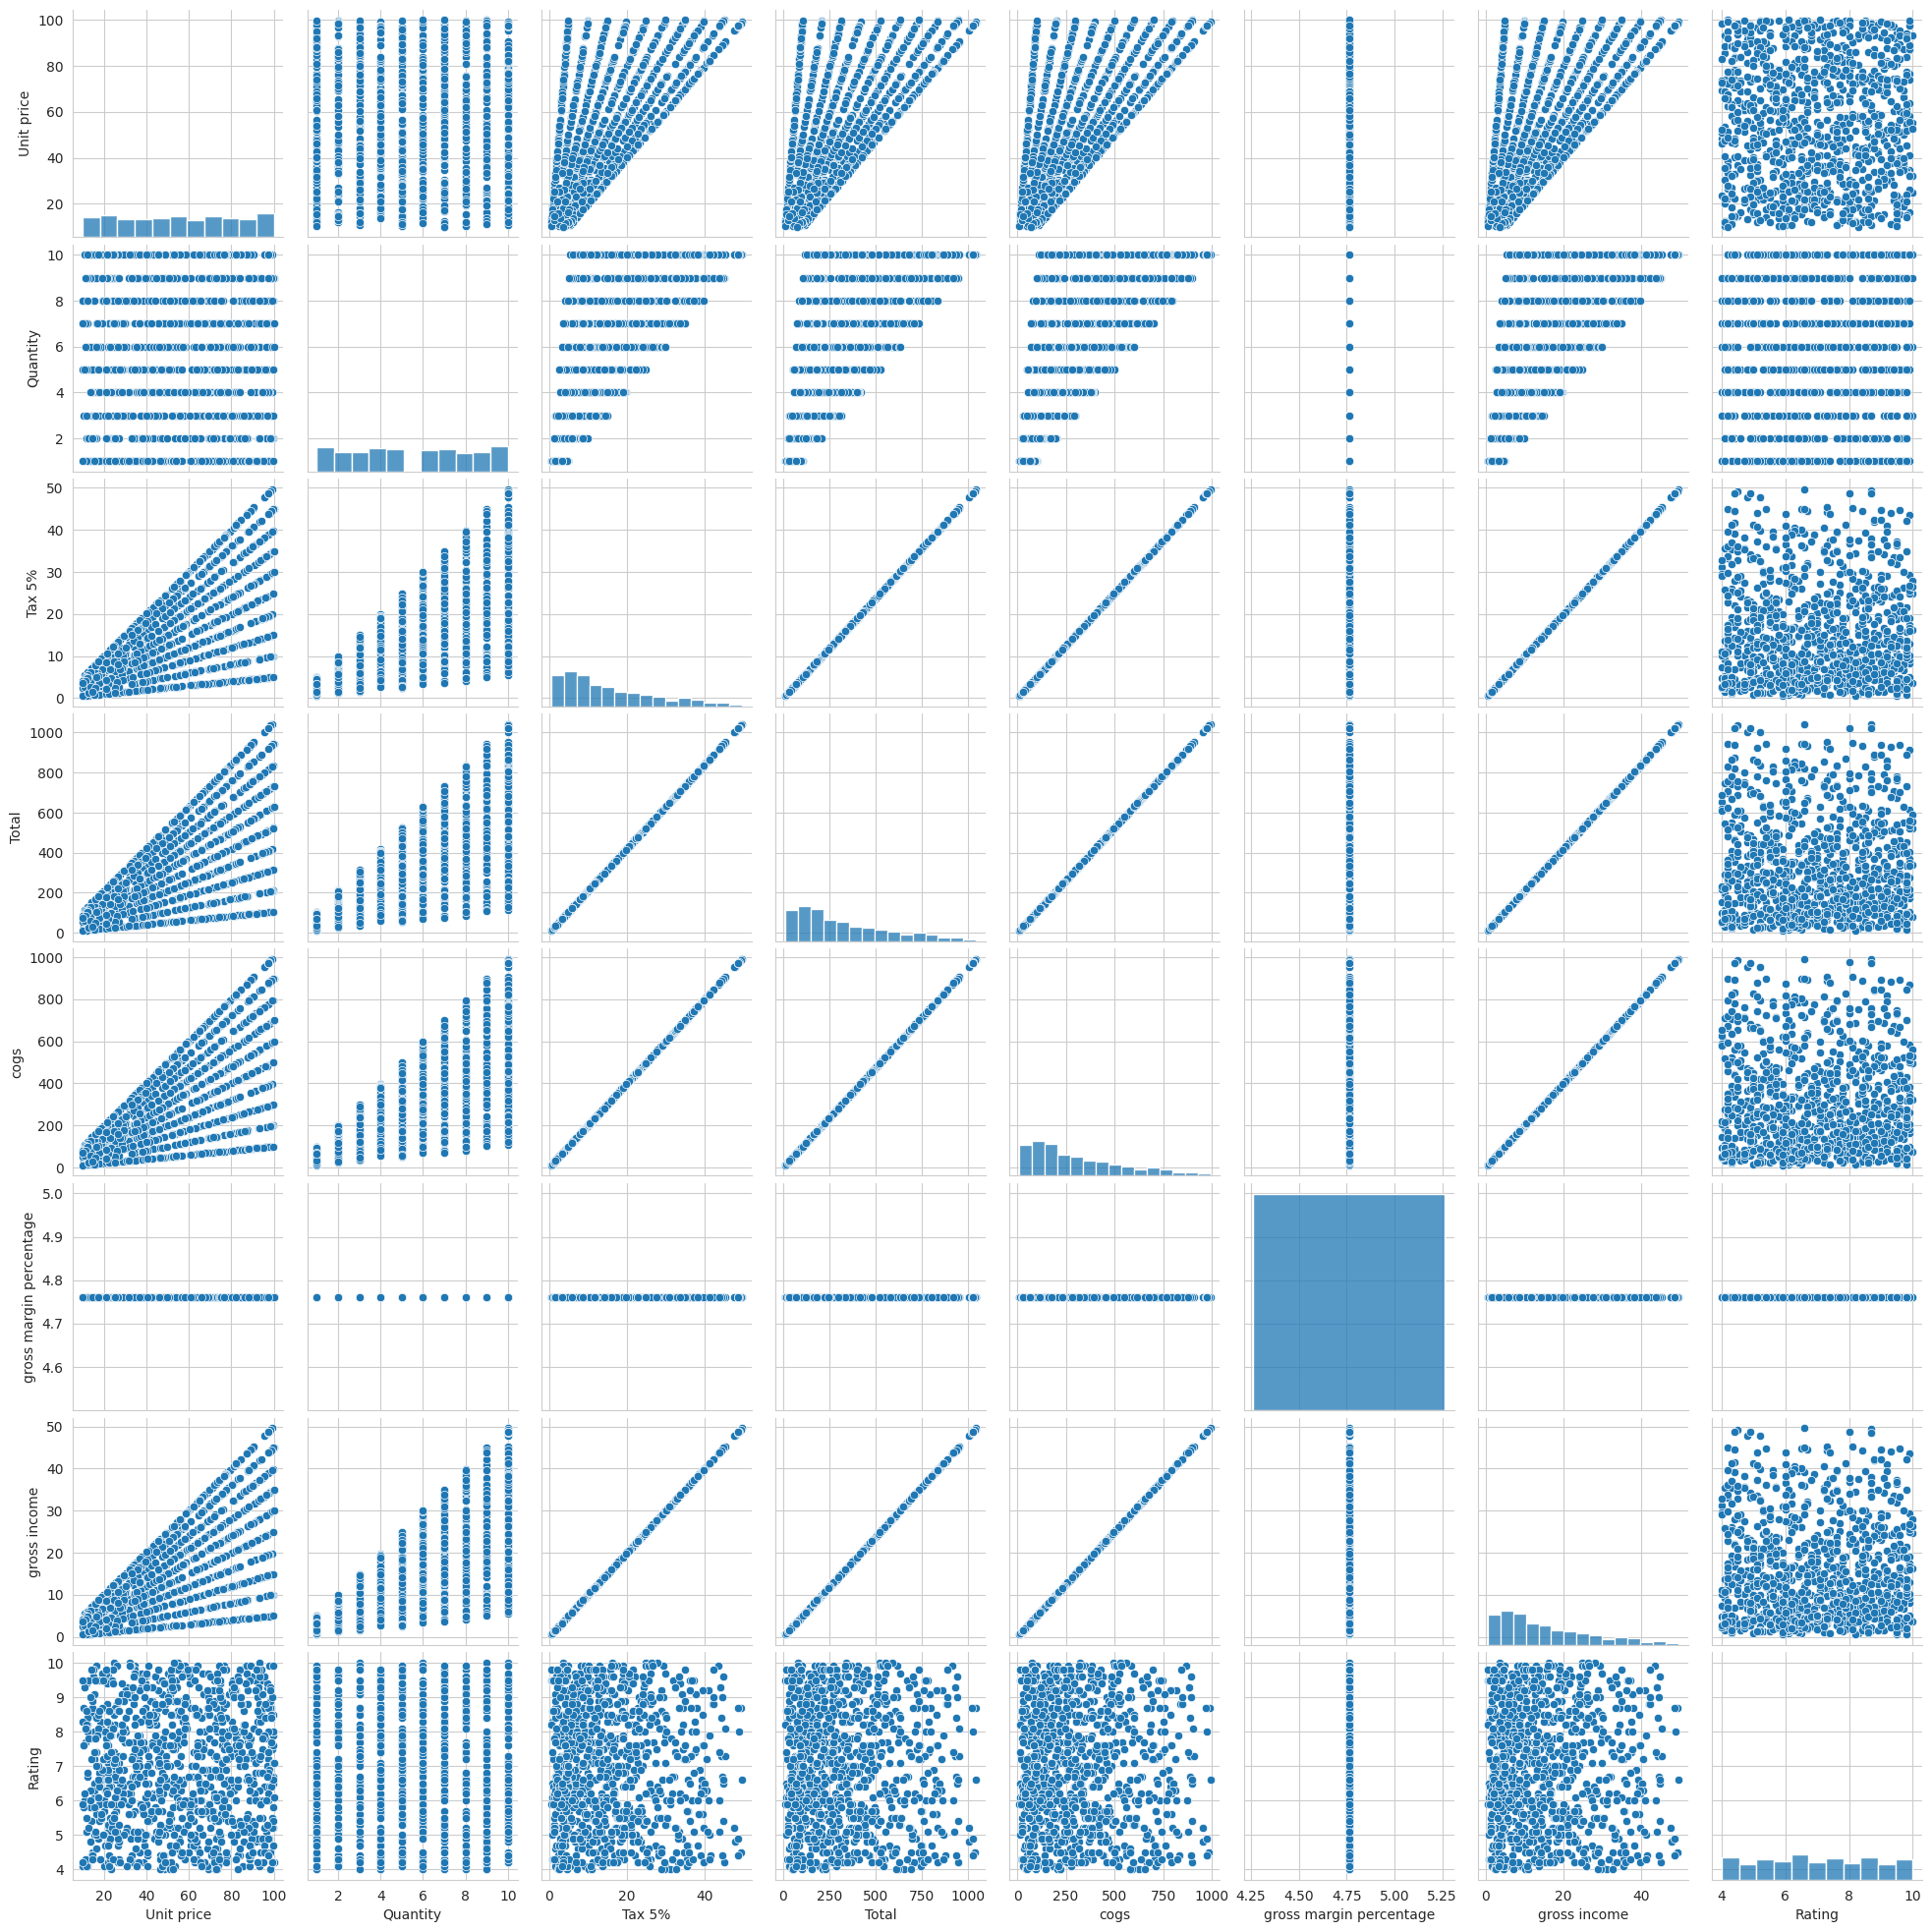

In [ ]:
sns.pairplot(data=df)

5. Barplot

* A barplot is one of the most common types of graphic.
* It shows the relationship between a numeric and a categoric variable.
* Each entity of the categoric variable is represented as a bar.
* The size of the bar represents its numeric value.

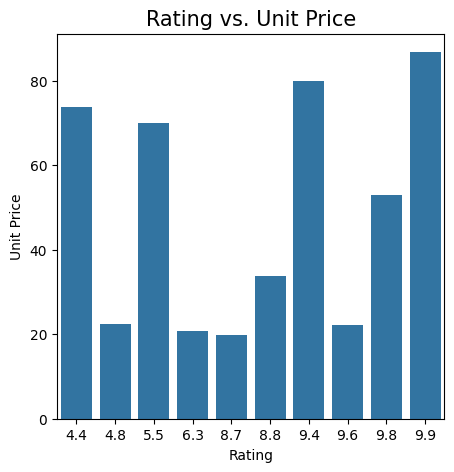

In [ ]:
plt.style.use("default")
plt.figure(figsize=(5, 5))
sns.barplot(x='Rating', y='Unit price', data=df[170:180])
plt.title("Rating vs. Unit Price", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

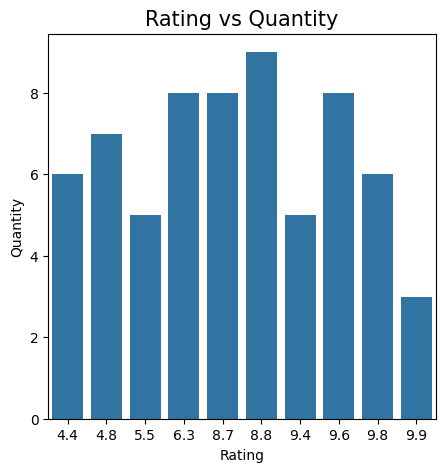

In [ ]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

6. Correlation

* When we train any algorithm, the number of features and their correlation plays an important role.
* If there are features and many of the features that are highly correlated, training an algorithm with all the features will reduce the accuracy.
* Thus, features selection should be done carefully.
* This dataset has less features but still we will see the correlation.

In [ ]:
df[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']].corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


<Axes: >

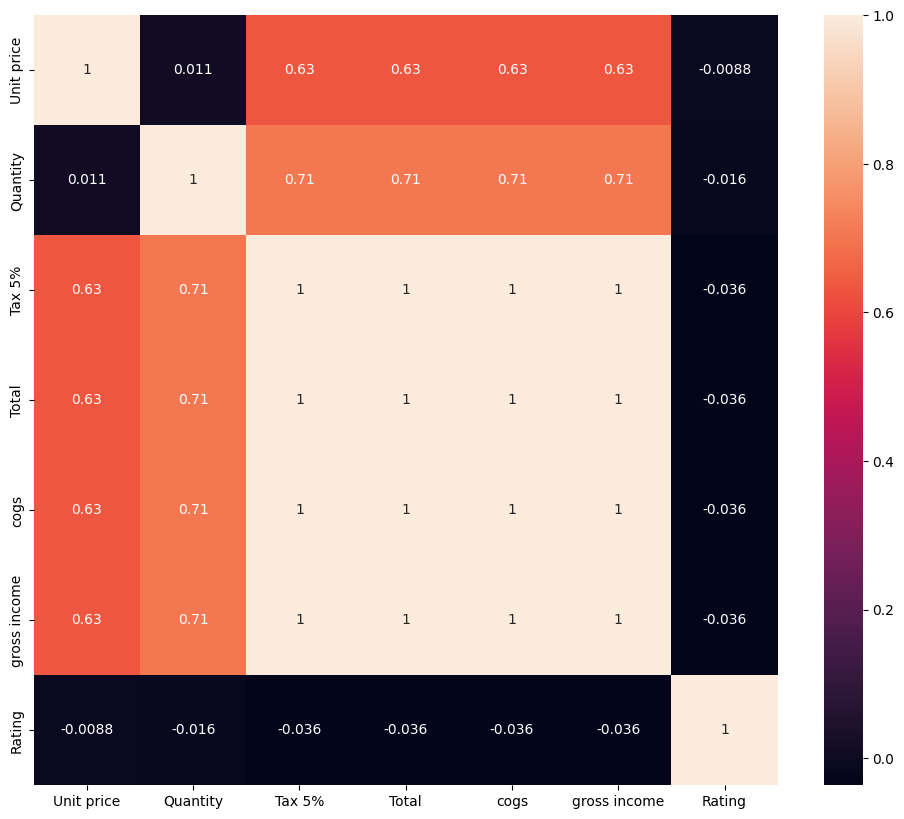

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']].corr(), annot=True)

In [ ]:
list_1=list(df.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [ ]:
le=LabelEncoder()
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


Splitting the data into training and testing datasets

In [ ]:
y=df['Gender']
x=df.drop('Gender', axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

### K-Nearest Neighbor (KNN)

* K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [ ]:
# uploaded = files.upload()

Saving KNN Algorithm.png to KNN Algorithm.png


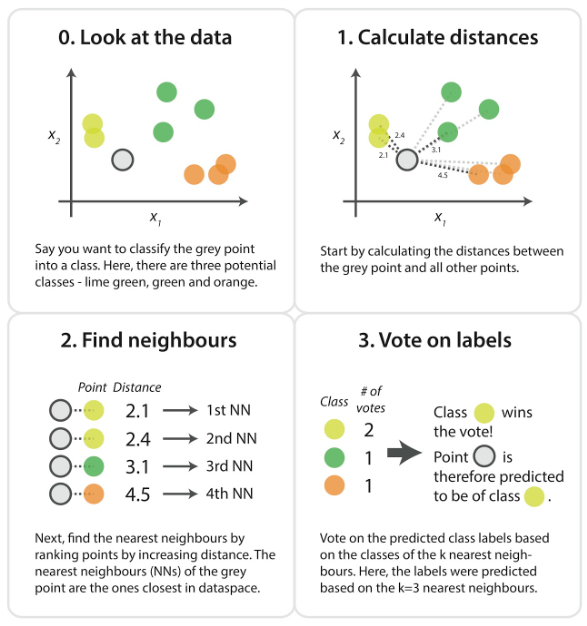

In [ ]:
from IPython.display import Image, display

display(Image('KNN Algorithm.png'))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(x_test)
print("Classification Report is:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Training Score:\n", knn.score(x_train, y_train)*100)
print("Test Score:\n", knn.score(x_test, y_test)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48       100
           1       0.47      0.45      0.46       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[49 51]
 [55 45]]
Training Score:
 64.75
Test Score:
 47.0


In [ ]:
score_knn = knn.score(x_test, y_test)

### Decision Tree

* A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails), each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels.
* The paths from root to leaf represent classification rules.

In [ ]:
# 가지치기 하지 않고

dtree = DecisionTreeClassifier(random_state=0, criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = dtree.predict(x_test)
print("Classification Report is:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Training Score:\n", dtree.score(x_train, y_train)*100)
print("Test Score:\n", dtree.score(x_test, y_test)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.51      0.52       100
           1       0.52      0.53      0.52       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

Confusion Matrix:
 [[51 49]
 [47 53]]
Training Score:
 100.0
Test Score:
 52.0


In [ ]:
score_dtree = dtree.score(x_test, y_test)

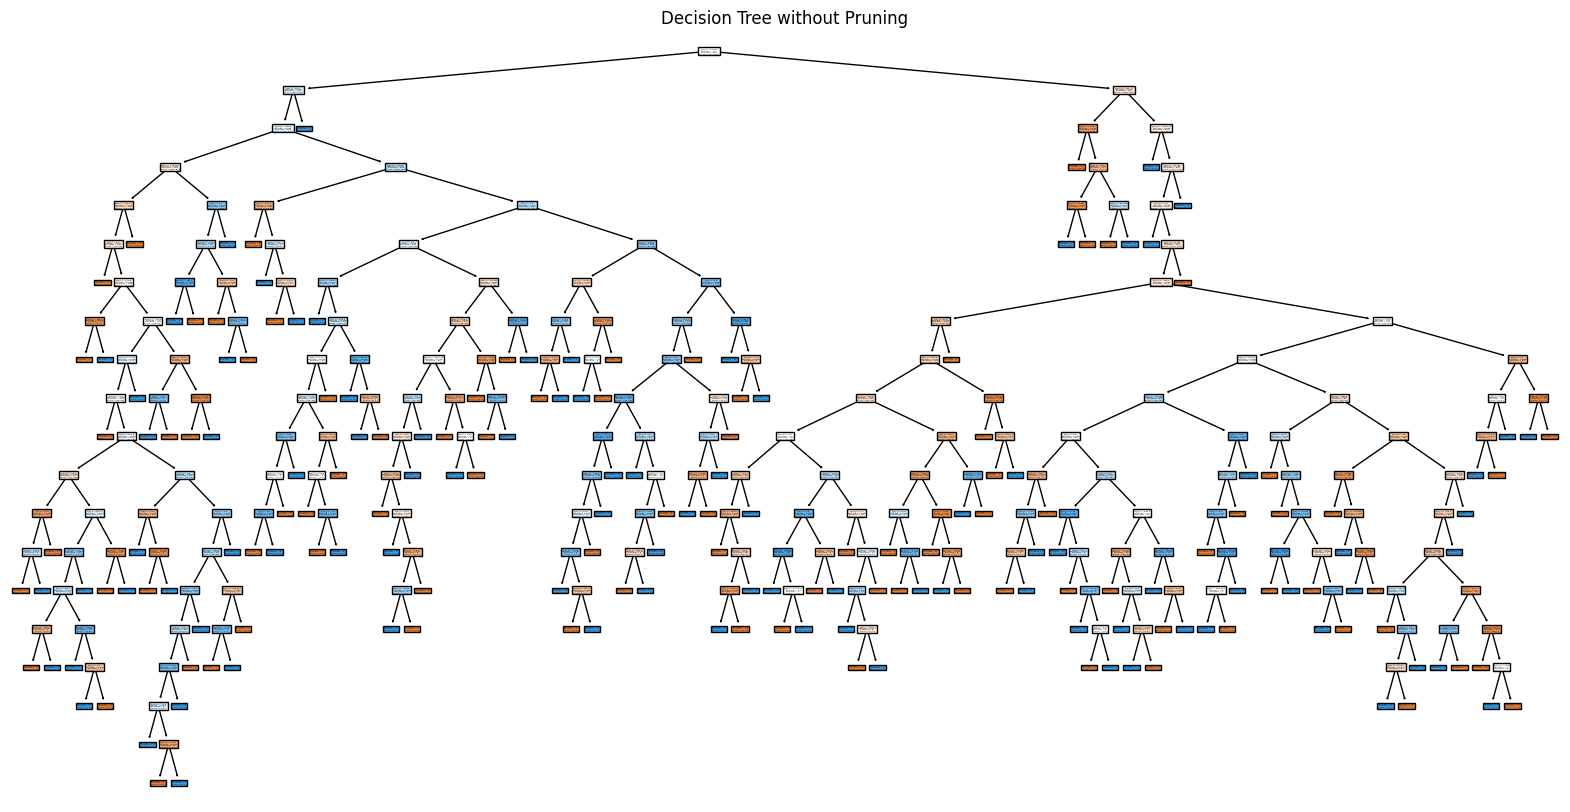

In [ ]:
# visualization

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True)
plt.title("Decision Tree without Pruning")
plt.show()

In [ ]:
# 최적의 depth 찾기

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(1, 21)}

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'max_depth': 16}
Best cross-validation score: 0.53


In [ ]:
best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(x_test)
print("Classification Report is:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Training Score:\n", best_dtree.score(x_train, y_train) * 100)
print("Test Score:\n", best_dtree.score(x_test, y_test) * 100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49       100
           1       0.50      0.51      0.50       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

Confusion Matrix:
 [[48 52]
 [49 51]]
Training Score:
 98.875
Test Score:
 49.5


In [ ]:
score_best_dtree = best_dtree.score(x_test, y_test)

In [ ]:
dtree_depth_six = DecisionTreeClassifier(max_depth=6, random_state=0,criterion='entropy')
dtree_depth_six.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [ ]:
y_pred=dtree_depth_six.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Test Score:\n",dtree.score(x_test,y_test)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.77      0.62       100
           1       0.54      0.27      0.36       100

    accuracy                           0.52       200
   macro avg       0.53      0.52      0.49       200
weighted avg       0.53      0.52      0.49       200

Confusion Matrix:
 [[77 23]
 [73 27]]
Training Score:
 100.0
Test Score:
 52.0


In [ ]:
score_dtree_depth_six = dtree_depth_six.score(x_test, y_test)

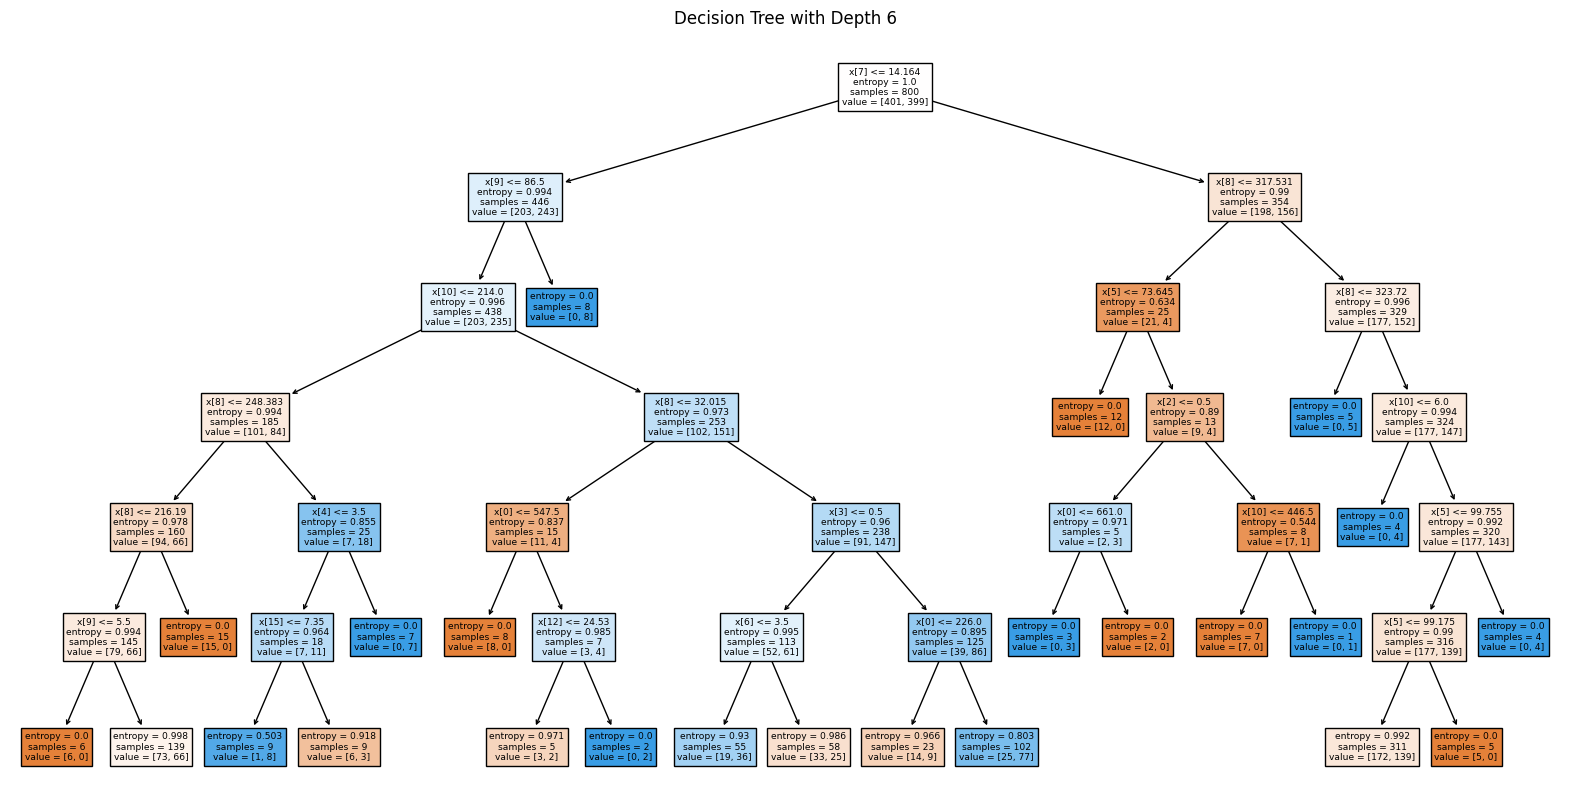

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dtree_depth_six, filled=True)
plt.title("Decision Tree with Depth 6")
plt.show()

### Random Forest

* Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

* A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

In [ ]:
# uploaded = files.upload()

Saving Random Forest.png to Random Forest.png


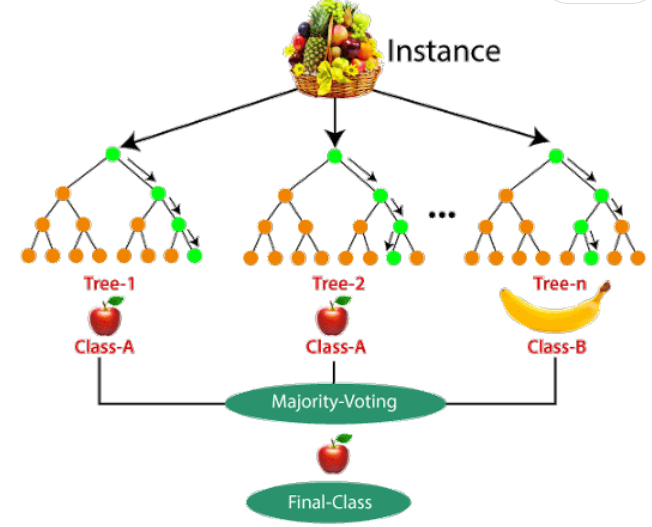

In [ ]:
display(Image("Random Forest.png"))

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Test Score:\n",rfc.score(x_test,y_test)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.55      0.53       100
           1       0.52      0.49      0.51       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

Confusion Matrix:
 [[55 45]
 [51 49]]
Training Score:
 100.0
Test Score:
 52.0


In [ ]:
score_rfc = rfc.score(x_test, y_test)

### Gradient Boosting Classifier

* The GradientBoostingClassifier is a machine learning model designed for classification tasks.
* It utilizes gradient boosting, an ensemble technique, to combine the predictions of multiple weak classifiers sequentially.
* With features like weighted voting, adjustable learning rates, and regularization parameters, it provides robust and accurate solutions for a wide range of classification problems.
* It is particularly useful when dealing with complex datasets and has applications in spam detection, fraud prevention, and image classification, among others.

In [ ]:
# uploaded = files.upload()

Saving Gradient Boosting Classifier.png to Gradient Boosting Classifier.png


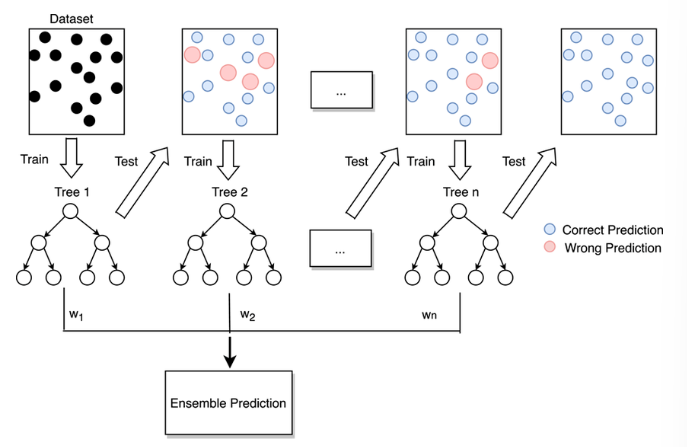

In [ ]:
display(Image("Gradient Boosting Classifier.png"))

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=gbc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Test Score:\n",gbc.score(x_test,y_test)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.50      0.49       100
           1       0.48      0.47      0.48       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion Matrix:
 [[50 50]
 [53 47]]
Training Score:
 88.0
Test Score:
 48.5


In [ ]:
score_gbc = gbc.score(x_test, y_test)

### Which is the best model?

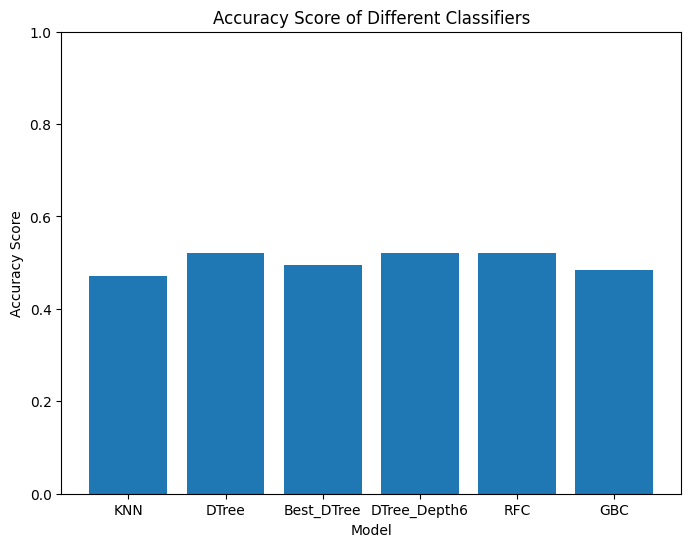

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(['KNN', 'DTree', 'Best_DTree', 'DTree_Depth6', 'RFC', 'GBC'], [score_knn, score_dtree, score_best_dtree, score_dtree_depth_six, score_rfc, score_gbc])
plt.ylim(0.0, 1.0)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Different Classifiers')
plt.show()

In [ ]:
print({"KNN": score_knn,
       "dtree": score_dtree,
       "best_dtree": score_best_dtree,
       "dtree_depth6": score_dtree_depth_six,
       "random forest": score_rfc,
       "gradient boosting": score_gbc})

{'KNN': 0.47, 'dtree': 0.52, 'best_dtree': 0.495, 'dtree_depth6': 0.52, 'random forest': 0.52, 'gradient boosting': 0.485}


The decision tree model without pruning, decision tree with a depth six, and random forest model yielded the highest accuracy score, which is 0.52.